# Mount Google Drive
Tindakan ini buat memicu otorisasi, yang memungkinkan Colab mengakses akun Google Drive-nya.

**Lokasi Dataset : "/PKM_KC 2025/ML MODEL/DATASET"**

In [3]:
# Mengimpor library yang diperlukan dari google.colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

## Dataset yang Dipakai:

*   **/PPG DATASET - Ashmit Cajla**



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

In [12]:
# Load dataset
dataset_file = '/content/drive/MyDrive/PKM_KC 2025/ML MODEL/DATASET/PPG DATASET - Ashmit Cajla/Dataset for People for their Blood Glucose Level with their Superficial body feature readings..xlsx'

try:
    df = pd.read_excel(dataset_file, header=2)
    print("✅ File berhasil dimuat!")
    print(f"Shape awal dataset: {df.shape}")

except FileNotFoundError:
    print("❌ ERROR: File tidak ditemukan.")


✅ File berhasil dimuat!
Shape awal dataset: (16969, 10)


In [30]:
# Tampilkan Info Awal
print("\n=== INFORMASI DATASET AWAL ===")
print(df.info())
print("\n=== 5 BARIS PERTAMA ===")
print(df.head())



=== INFORMASI DATASET AWAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         16969 non-null  int64   
 1   Blood Glucose Level(BGL)    16969 non-null  int64   
 2   Diastolic Blood Pressure    16969 non-null  int64   
 3   Systolic Blood Pressure     16969 non-null  int64   
 4   Heart Rate                  16969 non-null  int64   
 5   Body Temperature            16969 non-null  float64 
 6   SPO2                        16969 non-null  int64   
 7   Sweating  (Y/N)             16969 non-null  int64   
 8   Shivering (Y/N)             16969 non-null  int64   
 9   Diabetic/NonDiabetic (D/N)  16969 non-null  object  
 10  Age Range                   4046 non-null   category
dtypes: category(1), float64(1), int64(8), object(1)
memory usage: 1.3+ MB
None

=== 5 BARIS PERTAMA ===


In [15]:
# Drop kolom yang tidak diperlukan
columns_to_drop = ["Diabetic/NonDiabetic (D/N)", "Shivering (Y/N)", "Sweating  (Y/N)"]
df_clean = df.drop(columns=columns_to_drop)

print(f"\n✅ Kolom yang di-drop: {columns_to_drop}")
print(f"Shape dataset setelah dropping: {df_clean.shape}")


✅ Kolom yang di-drop: ['Diabetic/NonDiabetic (D/N)', 'Shivering (Y/N)', 'Sweating  (Y/N)']
Shape dataset setelah dropping: (16969, 7)


In [16]:
# Rename kolom untuk kemudahan
column_mapping = {
    'Blood Glucose Level(BGL)': 'BGL',
    'Diastolic Blood Pressure': 'DBP',
    'Systolic Blood Pressure': 'SBP',
    'Heart Rate': 'HR',
    'Body Temperature': 'Body_Temp',
    'SPO2': 'SPO2'
}
df_clean = df_clean.rename(columns=column_mapping)

print("\n=== DATASET SETELAH PREPROCESSING ===")
print(df_clean.info())
print("\n=== STATISTIK DESKRIPTIF ===")
print(df_clean.describe())


=== DATASET SETELAH PREPROCESSING ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        16969 non-null  int64  
 1   BGL        16969 non-null  int64  
 2   DBP        16969 non-null  int64  
 3   SBP        16969 non-null  int64  
 4   HR         16969 non-null  int64  
 5   Body_Temp  16969 non-null  float64
 6   SPO2       16969 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 928.1 KB
None

=== STATISTIK DESKRIPTIF ===
                Age           BGL           DBP           SBP            HR  \
count  16969.000000  16969.000000  16969.000000  16969.000000  16969.000000   
mean      30.988862     95.731864     77.173493    118.187165     91.524191   
std       25.585606     42.990652      7.241511      7.700363     10.409780   
min        9.000000     50.000000     60.000000     95.000000     78.000000   
25%        

# Visualisasi Data

## Distribusi Target Variable (BGL)

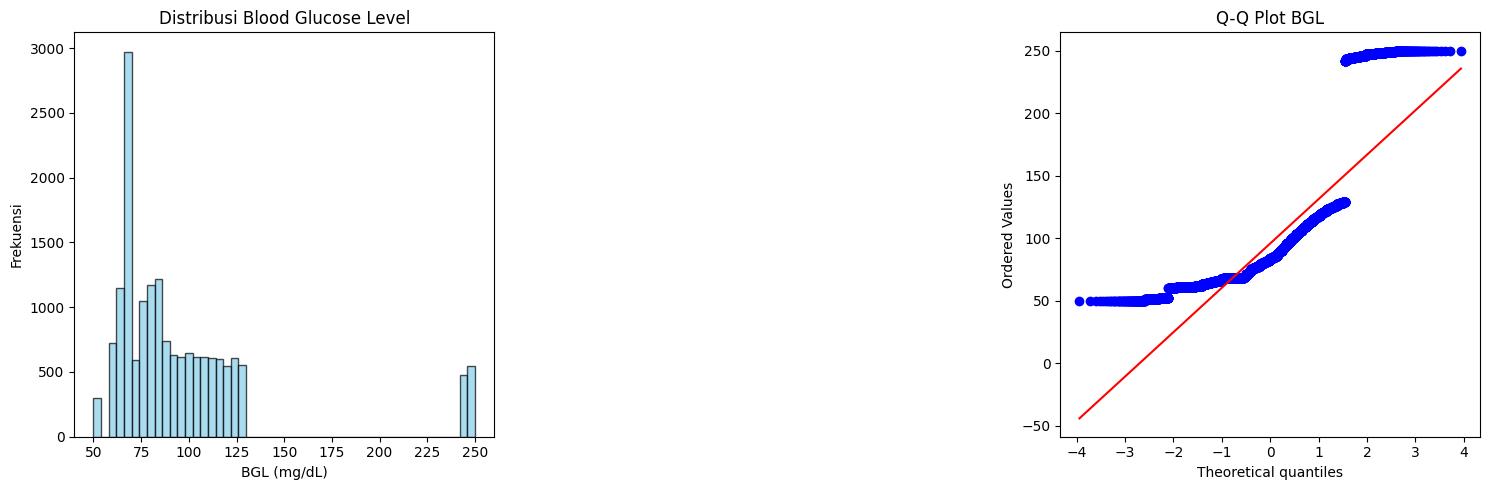

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_clean['BGL'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribusi Blood Glucose Level')
plt.xlabel('BGL (mg/dL)')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
stats.probplot(df_clean['BGL'], dist="norm", plot=plt)
plt.title('Q-Q Plot BGL')

plt.tight_layout()
plt.show()

## Correlation Heatmap

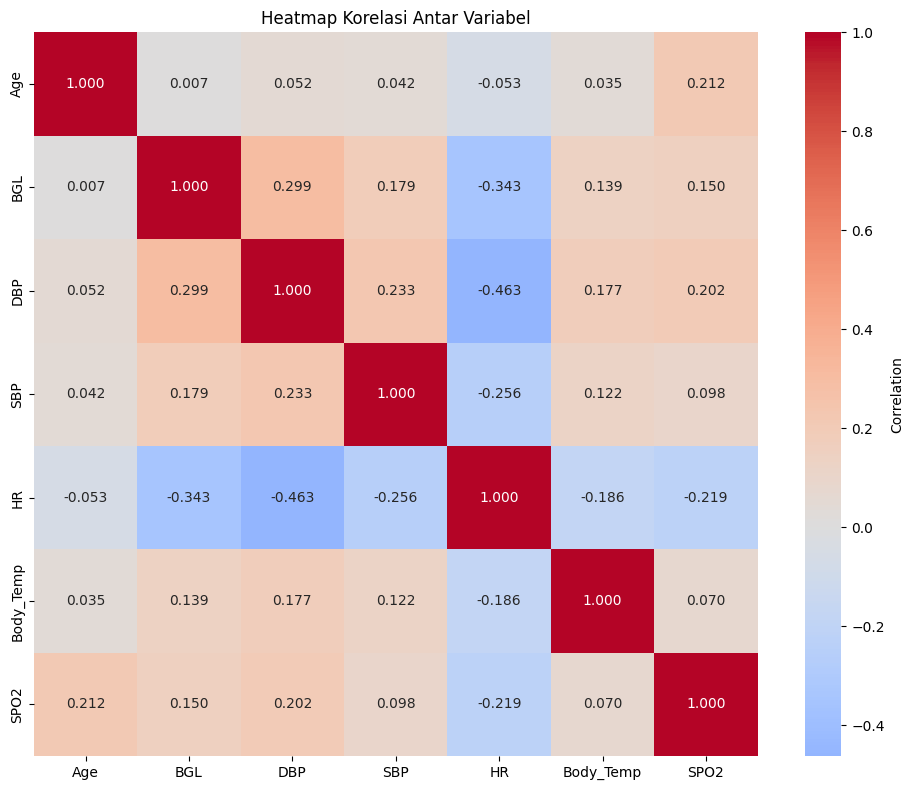


=== KORELASI DENGAN TARGET VARIABLE (BGL) ===
HR                       : -0.343
DBP                      :  0.299
SBP                      :  0.179
SPO2                     :  0.150
Body_Temp                :  0.139
Age                      :  0.007


In [18]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Heatmap Korelasi Antar Variabel')
plt.tight_layout()
plt.show()

# Print korelasi dengan target variable
print("\n=== KORELASI DENGAN TARGET VARIABLE (BGL) ===")
bgl_corr = correlation_matrix['BGL'].drop('BGL').sort_values(key=abs, ascending=False)
for feature, corr in bgl_corr.items():
    print(f"{feature:25}: {corr:6.3f}")

## Boxplot

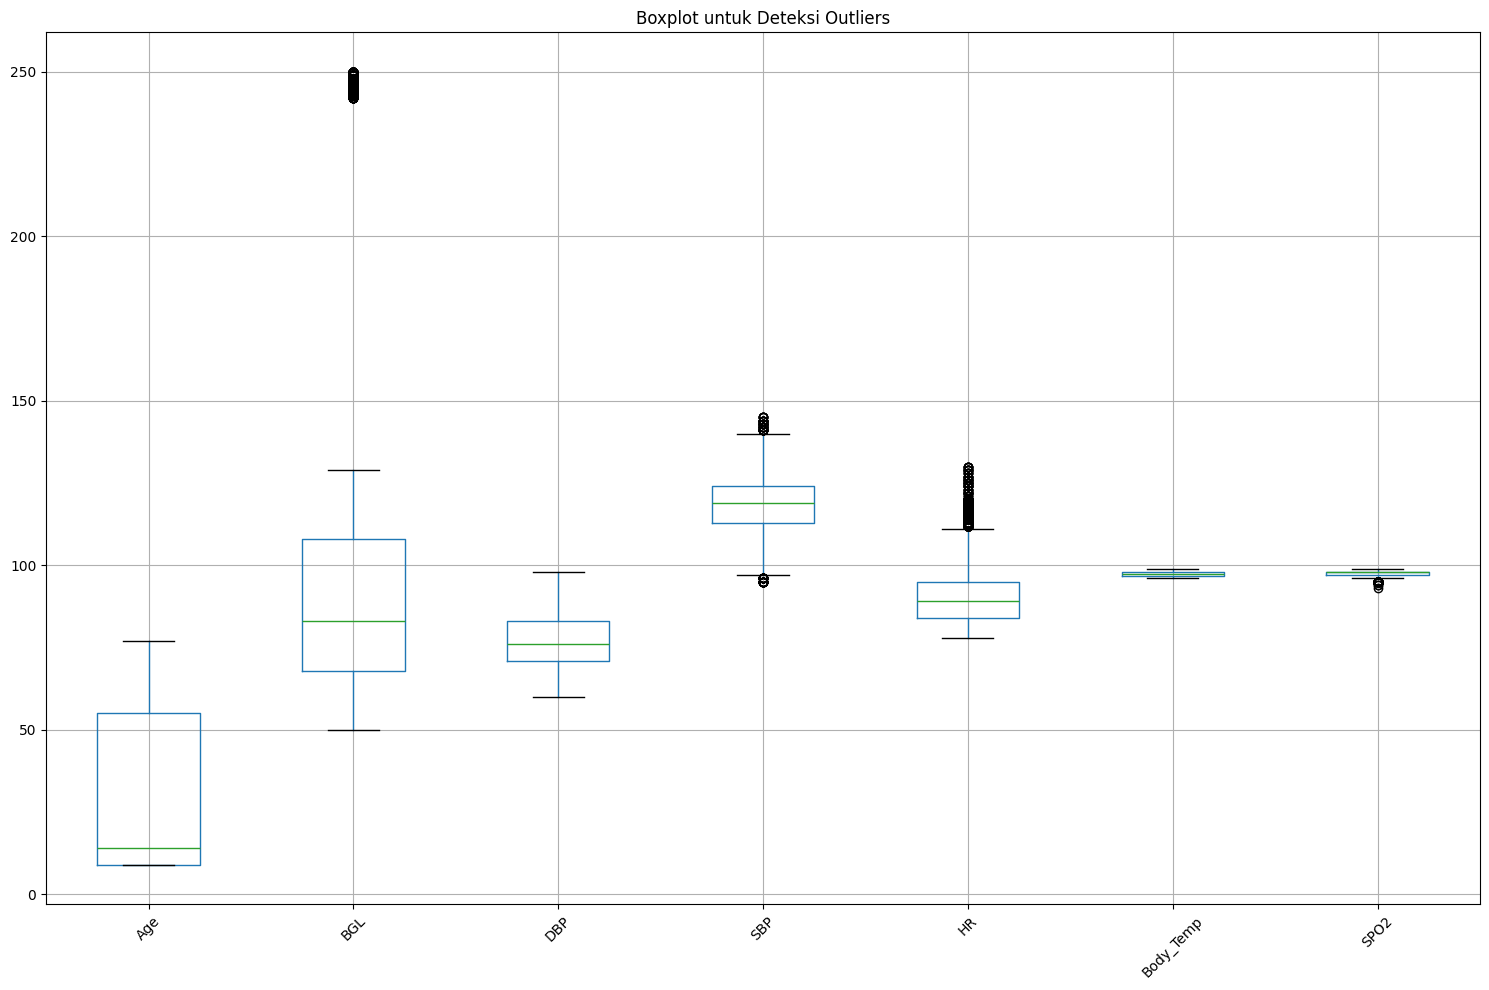

In [19]:
plt.figure(figsize=(15, 10))
df_clean.boxplot(figsize=(15, 10))
plt.title('Boxplot untuk Deteksi Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Preproccess Data

In [28]:
df_feature = df_clean.copy()

# Define the bins (age ranges) and the corresponding labels
bins = [0, 18, 35, 50, 65, 100]
labels = [1, 2, 3, 4, 5]

df_feature['Age_Category'] = pd.cut(df_feature['Age'],
                                  bins=bins,
                                  labels=labels)

df_feature = df_feature.drop(columns=['Age'])

df_feature.head()

,BGL,DBP,SBP,HR,Body_Temp,SPO2,Age_Category
0,79,73,118,98,98.300707,99,1
1,80,73,119,102,98.300707,94,1
2,70,76,110,81,98.300707,98,1
3,70,78,115,96,98.300707,96,1
4,100,96,144,92,97.807052,98,5


In [29]:
X = df_feature.drop(columns=['BGL'])  # Fitur
y = df_feature['BGL']  # Target

# Fitur numerik yang akan di-scale (tanpa Age_Category)
features_to_scale = ['DBP', 'SBP', 'HR', 'Body_Temp', 'SPO2']

# Inisialisasi dan terapkan StandardScaler
scaler = StandardScaler()
X_scaled_features = scaler.fit_transform(X[features_to_scale])

# Buat DataFrame baru untuk fitur yang sudah discale
X_scaled_df = pd.DataFrame(X_scaled_features, columns=features_to_scale, index=X.index)

# Gabungkan kembali dengan Age_Category
X_final = pd.concat([X[['Age_Category']], X_scaled_df], axis=1)

# Cek bentuk akhir
print(f"Shape fitur (X_final): {X_final.shape}")
print(f"Shape target (y): {y.shape}")

# Optional: Lihat beberapa baris pertama
print(X_final.head())

Shape fitur (X_final): (16969, 6)
Shape target (y): (16969,)
  Age_Category       DBP       SBP        HR  Body_Temp      SPO2
0            1 -0.576346 -0.024307  0.622107   1.161063  1.906051
1            1 -0.576346  0.105561  1.006373   1.161063 -3.985563
2            1 -0.162056 -1.063249 -1.011020   1.161063  0.727728
3            1  0.114138 -0.413910  0.429975   1.161063 -1.628917
4            5  2.599880  3.352257  0.045709   0.554258  0.727728
